# 20220327-zoo-stats
- Cumulative statistics (weighted over simpoints)
    - Accuracy
    - Coverage
    - IPC improvement (over no prefetcher)
    - MPKI reduction (over no prefetcher)
    - DRAM bandwidth reduction (over no prefetcher)
- Collecting statistics (from `Pythia` directory):
    - Create Zoo sweep by running `./experiments/prefetcher_zoo.py condor_setup`
    - Evaluate Zoo sweep by running `./experiments/prefetcher_zoo.py eval`

In [1]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display

from utils import utils, stats

from importlib import reload
reload(stats)
reload(utils)

<module 'utils.utils' from '/u/cmolder/GitHub/prefetching-zoo/utils/utils.py'>

In [2]:
weight_path = '/scratch/cluster/cmolder/traces/prefetcher_zoo/champsim/weights.txt'
weights = utils.read_weights_file(weight_path)

In [3]:
# Add SPEC results
data_path_spec = '/u/cmolder/GitHub/Pythia/out/prefetcher_zoo/2022_04_25_spec06.csv'
df = utils.read_data_file(data_path_spec)

In [4]:
# Add GAP results
data_path_gap = '/u/cmolder/GitHub/Pythia/out/prefetcher_zoo/2022_04_25_gap.csv'
df_gap = utils.read_data_file(data_path_gap)
df = df.append(df_gap)

In [5]:
# Add CloudSuite results
data_path_cs = '/u/cmolder/GitHub/Pythia/out/prefetcher_zoo/2022_04_08_cloudsuite.csv'
df_cs = utils.read_data_file(data_path_cs)
df = df.append(df_cs)

In [6]:
# Add PC trace (max accuracy, max num useful) results
data_path_pctrace_accuracy = '/u/cmolder/GitHub/Pythia/out/prefetcher_zoo/2022_04_25_spec06_pctrace_accuracy.csv'
data_path_pctrace_num_useful = '/u/cmolder/GitHub/Pythia/out/prefetcher_zoo/2022_04_25_spec06_pctrace_num_useful.csv'
data_path_pctrace_marg_useful = '/u/cmolder/GitHub/Pythia/out/prefetcher_zoo/2022_04_25_spec06_pctrace_marginal_useful.csv'

df_pta = utils.read_data_file(data_path_pctrace_accuracy)
df_ptnu = utils.read_data_file(data_path_pctrace_num_useful)
df_ptmu = utils.read_data_file(data_path_pctrace_marg_useful)
df_pta.LLC_pref, df_pta.all_pref = 'pc_comb_acc', [('no', 'no', 'pc_comb_acc')]*len(df_pta)
df_ptnu.LLC_pref, df_ptnu.all_pref = 'pc_comb_num_useful', [('no', 'no', 'pc_comb_num_useful')]*len(df_ptnu)
df_ptmu.LLC_pref, df_ptmu.all_pref = 'pc_comb_marg_useful', [('no', 'no', 'pc_comb_marg_useful')]*len(df_ptmu)

df = df.append(df_pta)
df = df.append(df_ptnu)
df = df.append(df_ptmu)

In [7]:
pd.set_option('display.max_rows', 100)
display(df[df.full_trace == 'astar_313B'])

,full_trace,trace,simpoint,L1D_pref,L1D_accuracy,L1D_coverage,L1D_mpki,L1D_mpki_reduction,L2C_pref,L2C_pref_degree,...,LLC_coverage,LLC_mpki,LLC_mpki_reduction,dram_bw_epochs,dram_bw_reduction,ipc,ipc_improvement,path,baseline_path,all_pref
42,astar_313B,astar,313B,no,100.0,0.394650,54.528679,0.0,no,"(None,)",...,9.757911,32.32940,24.569410,3499610,9.503408,0.11394,10.718103,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,"(no, no, pythia)"
43,astar_313B,astar,313B,no,100.0,0.394412,54.528809,0.0,no,"(None,)",...,11.137471,31.83517,27.145689,3594408,7.052022,0.11087,7.734914,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,"(no, no, bingo)"
44,astar_313B,astar,313B,no,100.0,0.392348,54.529939,0.0,no,"(None,)",...,-2.939524,36.87828,7.229004,3877146,-0.259315,0.10264,-0.262365,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,"(no, no, bo)"
45,astar_313B,astar,313B,no,100.0,0.371488,54.541359,0.0,no,"(None,)",...,40.024100,21.48648,50.515287,2627725,32.049526,0.15277,48.450102,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,"(no, no, sisb)"
46,astar_313B,astar,313B,no,100.0,0.370501,54.541899,0.0,no,"(None,)",...,4.868334,34.08110,18.079438,3643749,5.776110,0.10934,6.248178,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,"(no, no, sms)"
47,astar_313B,astar,313B,no,100.0,0.371908,54.541129,0.0,no,"(None,)",...,-3.102733,36.93675,7.155161,3870487,-0.087119,0.10282,-0.087455,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,"(no, no, spp)"
48,astar_313B,astar,313B,no,100.0,0.371944,54.541109,0.0,no,"(None,)",...,12.278121,31.42653,28.353590,3576545,7.513942,0.11143,8.279079,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,"(no, no, bingo_pythia)"
49,astar_313B,astar,313B,no,100.0,0.370885,54.541689,0.0,no,"(None,)",...,11.277903,31.78486,27.331002,3611367,6.613478,0.11033,7.210184,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,"(no, no, bingo_bo)"
50,astar_313B,astar,313B,no,100.0,0.370922,54.541669,0.0,no,"(None,)",...,39.772350,21.57667,52.328361,3043025,21.310263,0.13142,27.703819,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,"(no, no, bingo_sisb)"
51,astar_313B,astar,313B,no,100.0,0.371360,54.541429,0.0,no,"(None,)",...,6.159158,33.61866,19.904158,3616377,6.483924,0.11018,7.064425,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,/scratch/cluster/cmolder/prefetcher_zoo/2022_0...,"(no, no, bo_sms)"


---
## Helper functions

In [14]:
all_opportunity_prefetchers = [
    ('no', 'no', 'phase_comb'), 
    ('no', 'no', 'pc_comb_acc'), 
    ('no', 'no', 'pc_comb_num_useful'),
    ('no', 'no', 'pc_comb_marg_useful')
]

def _get_label(prefetcher, prefetcher_list=None):
    if prefetcher in all_opportunity_prefetchers:
        return ' '.join(prefetcher)
    else: return f'({prefetcher_list.index(prefetcher)+1}) {" ".join(prefetcher)}' if prefetcher_list is not None else prefetcher
    
def _get_color(prefetcher):
    colors = {
        ('no', 'no', 'phase_comb'): 'blue',
        ('no', 'no', 'pc_comb_acc'): 'limegreen',
        ('no', 'no', 'pc_comb_num_useful'): 'forestgreen',
        ('no', 'no', 'pc_comb_marg_useful'): 'darkgreen',
    }
    if prefetcher in colors.keys():
        return colors[prefetcher]
    else: return None
    
def _get_hatch(prefetcher):
    return None
    # if prefetcher in ['phase_combined', 'pc_combined_acc', 'pc_combined_nuseful']:
    #     return '/'
    # else: return None

def plot_cumulative_statistics(df, weights, metric='accuracy', method='weighted',
                               prefetchers=None,
                               opportunity_prefetchers=all_opportunity_prefetchers,
                               benchmarks=None,
                               dpi=192,
                               ymin=None, ymax=None):
    
    # Filter benchmarks
    if benchmarks is not None:
        df = df[df.trace.isin(benchmarks)]
        
    # Filter or weight simpoints  
    # Add phase_combined
    if method == 'weighted':
        df = stats.get_weighted_statistics(df, weights, add_phase_combined=True) # Weighted simpoints
    else:
        df = df[df.full_trace.isin(stats.get_longest_simpoints(weights))] # Longest simpoint
        
    # Filter prefetchers by weighted simpoints
    if prefetchers is not None:
        df = df[df.all_pref.isin(prefetchers + opportunity_prefetchers)]
    
    # Plot
    df = df.sort_values('trace',key=lambda col: col.str.lower())
    traces = df['trace'].unique()
    num_prefetchers = len(df.groupby('all_pref'))
    num_traces = len(df.groupby('trace'))
    mean_metric = 'amean' if metric in utils.amean_metrics else 'gmean'
    sep = 3
    
    fig, ax = plt.subplots(figsize=(14, 6), dpi=dpi)
    ax.grid(axis='y', color='lightgray')
    ax.axhline(0, color='black')
    ax.set_axisbelow(True)
    
    if prefetchers is not None:
        pf_list = prefetchers + opportunity_prefetchers
    else:
        pf_list = pd.unique(df[['L1D_pref', 'L2C_pref', 'LLC_pref']].values.ravel('K'))
    
    for i, pf in enumerate(pf_list):
        df_pf = df[df.all_pref == pf]
        y = df_pf[metric].to_numpy()
        y = np.append(y, utils.mean(y, metric))
        X = np.arange(0, len(y)) * (num_prefetchers + sep) + i
        label = _get_label(pf, prefetchers)
        color = _get_color(pf)
        hatch = _get_hatch(pf)
        ax.bar(X, y, label=label, color=color, hatch=hatch)
        
    ax.set_yticks(np.arange(ymin, ymax, 10))
    ax.set_xticks(np.arange(0, len(traces) + 1) * (num_prefetchers + sep) + (num_prefetchers)/2)
    ax.set_xticklabels(traces.tolist() + [mean_metric], rotation=45)
    ax.legend(bbox_to_anchor=(1,1), loc='upper left')
    
    fig.suptitle(f'{metric} ({method} simpoint)')
    ax.set_xlabel('Trace')
    ax.set_ylabel(metric)
    ax.set_ylim(ymin=ymin, ymax=ymax) 
    fig.tight_layout()

---
## SPEC '06 cumulative statistics

### Top 5 by IPC improvement

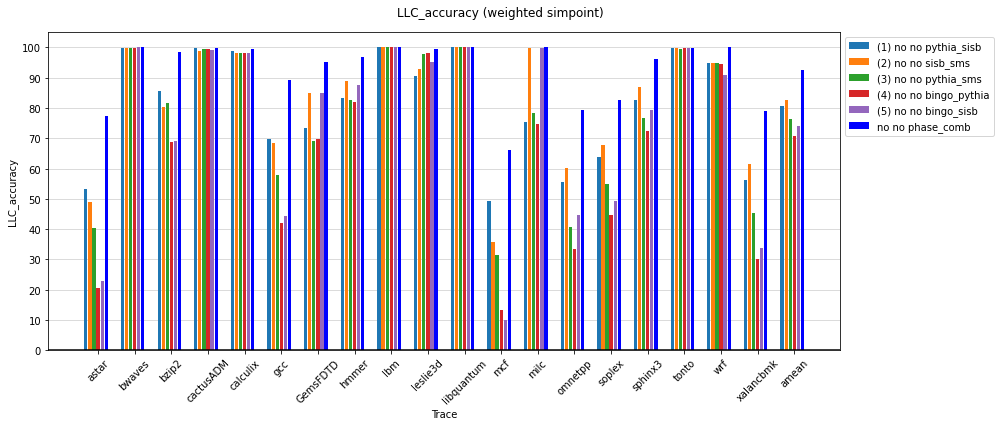

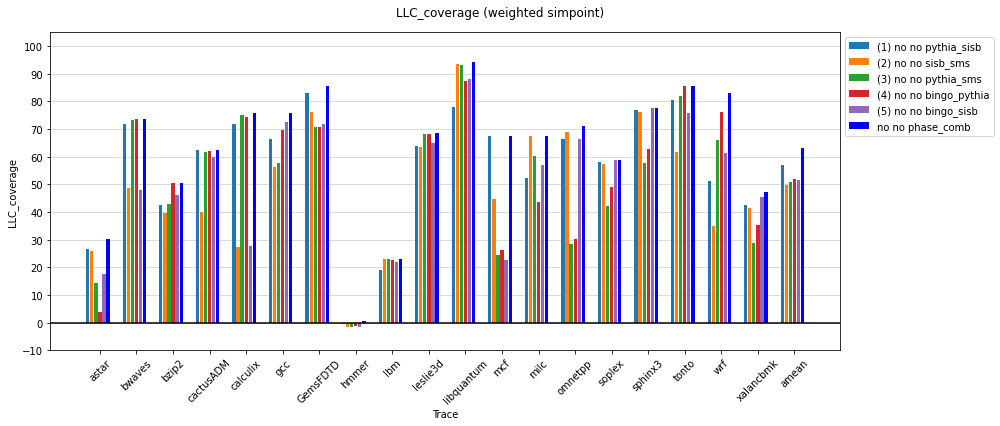

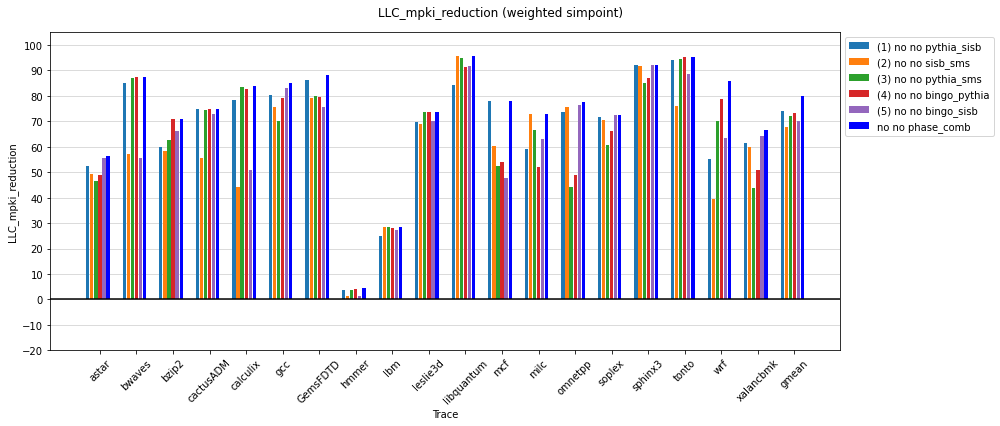

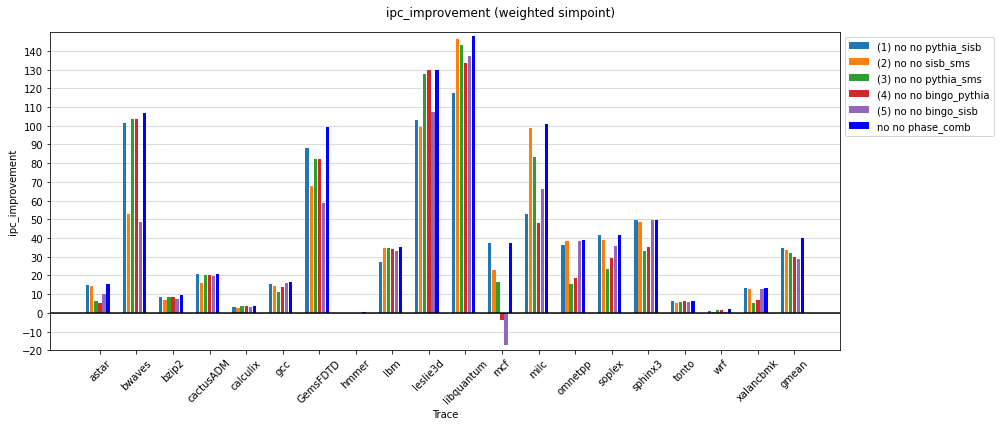

In [15]:
spec_top_5 = utils.rank_prefetchers(df[df.trace.isin(utils.spec)], 'ipc_improvement', 5)
opp_pref = [('no', 'no', 'phase_comb')]
dpi = None

reload(utils)
reload(stats)

# Accuracy
plot_cumulative_statistics(df, weights, metric='LLC_accuracy', method='weighted',
                           prefetchers=spec_top_5,
                           opportunity_prefetchers=opp_pref,
                           benchmarks=utils.spec,
                           ymin=0, ymax=105, dpi=dpi)
plt.savefig('plots/zoo-stats/accuracy_5_spec.pdf')

# Coverage
plot_cumulative_statistics(df, weights, metric='LLC_coverage', method='weighted',
                           prefetchers=spec_top_5,
                           opportunity_prefetchers=opp_pref,
                           benchmarks=utils.spec,
                           ymin=-20, ymax=105, dpi=dpi)
plt.savefig('plots/zoo-stats/coverage_5_spec.pdf')

# MPKI reduction
plot_cumulative_statistics(df, weights, metric='LLC_mpki_reduction', method='weighted',
                           prefetchers=spec_top_5,
                           opportunity_prefetchers=opp_pref,
                           benchmarks=utils.spec,
                           ymin=-20, ymax=105, dpi=dpi)
plt.savefig('plots/zoo-stats/mpki_reduction_5_spec.pdf')

# DRAM bandwidth reduction
# plot_cumulative_statistics(df, weights, metric='dram_bw_reduction', method='weighted',
#                            prefetchers=spec_top_5,
#                            opportunity_prefetchers=opp_pref,
#                            benchmarks=utils.spec,
#                            ymin=-20, ymax=100, dpi=dpi)
# plt.savefig('plots/zoo-stats/dram_bw_reduction_5_spec.pdf')

# IPC improvement
plot_cumulative_statistics(df, weights, metric='ipc_improvement', method='weighted',
                           prefetchers=spec_top_5,
                           opportunity_prefetchers=opp_pref,
                           benchmarks=utils.spec,
                           ymin=-20, ymax=150, dpi=dpi)
plt.savefig('plots/zoo-stats/ipc_improvement_5_spec.pdf')

### Opportunity prefetchers

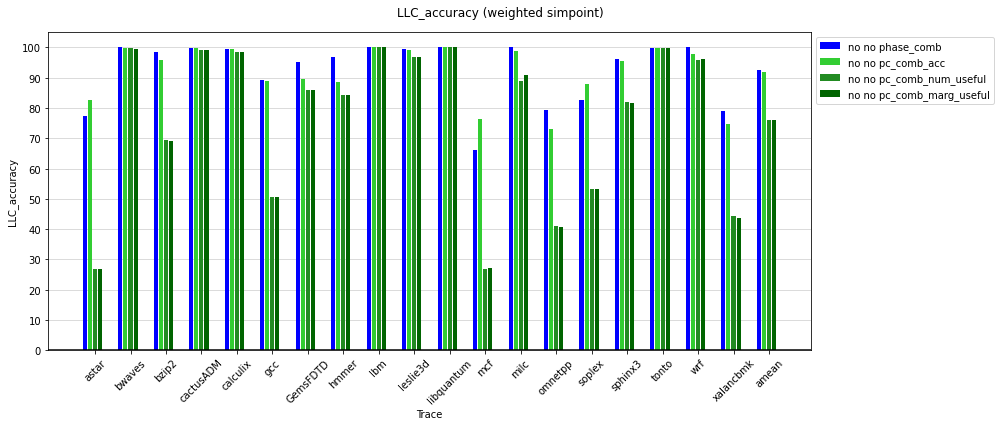

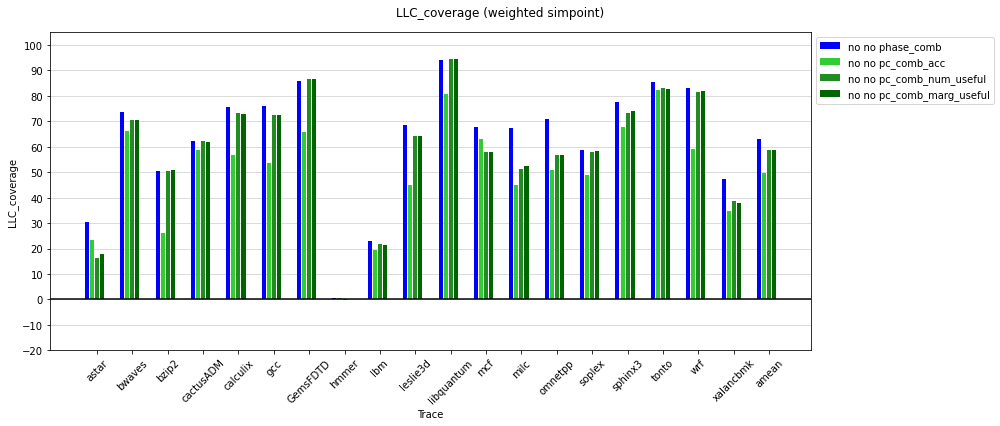

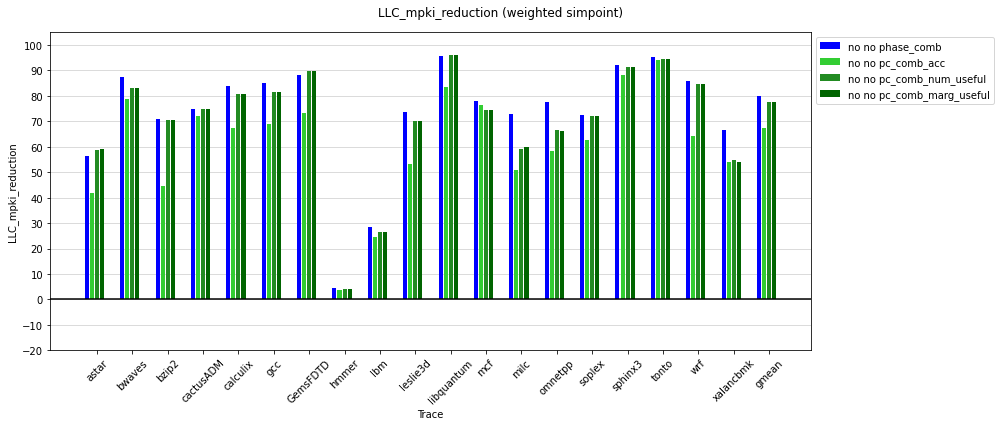

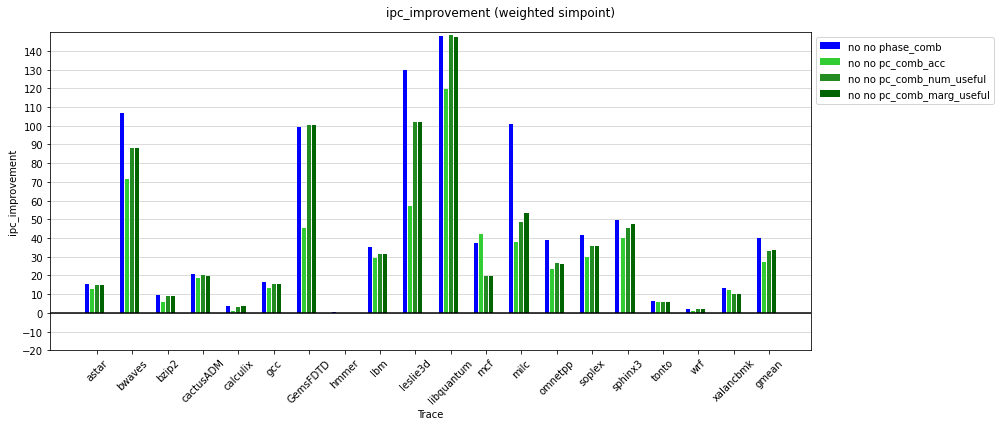

In [22]:
dpi = None

# Accuracy
plot_cumulative_statistics(df, weights, metric='LLC_accuracy', method='weighted',
                           prefetchers=[],
                           benchmarks=utils.spec,
                           ymin=0, ymax=105, dpi=dpi)
plt.savefig('plots/zoo-stats/accuracy_opportunity_spec.pdf')

# Coverage
plot_cumulative_statistics(df, weights, metric='LLC_coverage', method='weighted',
                           prefetchers=[],
                           benchmarks=utils.spec,
                           ymin=-20, ymax=105, dpi=dpi)
plt.savefig('plots/zoo-stats/coverage_opportunity_spec.pdf')

# MPKI reduction
plot_cumulative_statistics(df, weights, metric='LLC_mpki_reduction', method='weighted',
                           prefetchers=[],
                           benchmarks=utils.spec,
                           ymin=-20, ymax=105, dpi=dpi)
plt.savefig('plots/zoo-stats/mpki_reduction_opportunity_spec.pdf')

# IPC improvement
plot_cumulative_statistics(df, weights, metric='ipc_improvement', method='weighted',
                           prefetchers=[],
                           benchmarks=utils.spec,
                           ymin=-20, ymax=150, dpi=dpi)
plt.savefig('plots/zoo-stats/ipc_improvement_opportunity_spec.pdf')

---
## GAP cumulative statistics

### Top 5 by IPC improvement
- Note: Weighted vs. longest simpoint doesn't matter here, since all gap traces are single-simpoint.

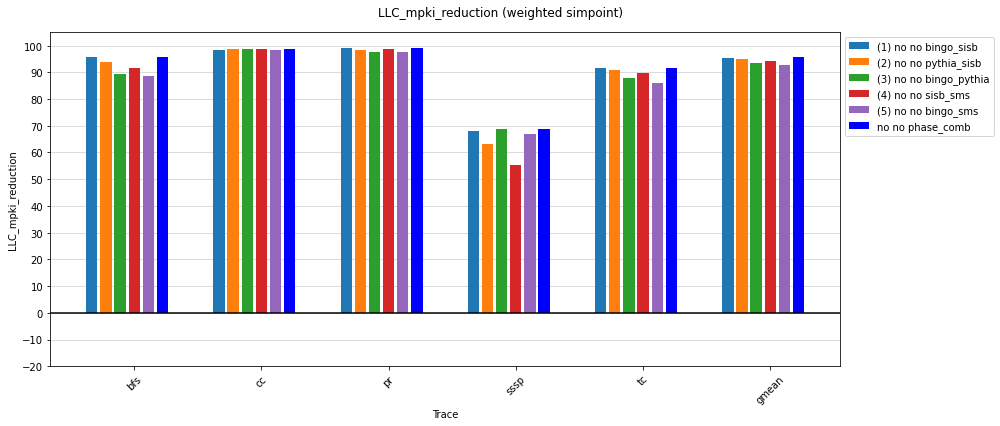

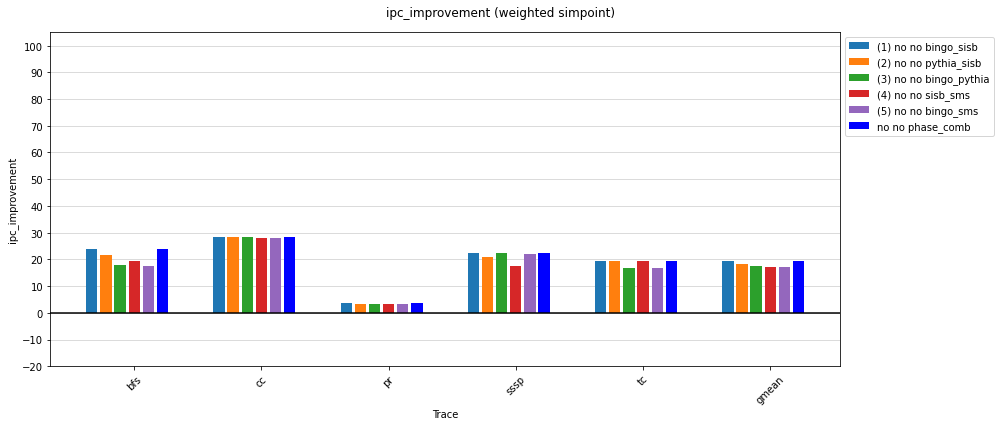

In [23]:
gap_top_5 = utils.rank_prefetchers(df[df.trace.isin(utils.gap)], 'ipc_improvement', 5)
opp_pref = [('no', 'no', 'phase_comb')]
dpi = None

# MPKI reduction
plot_cumulative_statistics(df, weights, metric='LLC_mpki_reduction', method='weighted',
                           prefetchers=gap_top_5,
                           opportunity_prefetchers=opp_pref,
                           benchmarks=utils.gap,
                           ymin=-20, ymax=105, dpi=dpi)
plt.savefig('plots/zoo-stats/mpki_reduction_5_gap.pdf')

# DRAM bw reduction
# plot_cumulative_statistics(df, weights, metric='dram_bw_reduction', method='weighted',
#                            prefetchers=gap_top_5,
#                            opportunity_prefetchers=opp_pref,
#                            benchmarks=utils.gap,
#                            ymin=-60, ymax=60, dpi=dpi)
# plt.savefig('plots/zoo-stats/dram_bw_reduction_5_gap.pdf')

# IPC improvement
plot_cumulative_statistics(df, weights, metric='ipc_improvement', method='weighted',
                           prefetchers=gap_top_5,
                           opportunity_prefetchers=opp_pref,
                           benchmarks=utils.gap,
                           ymin=-20, ymax=105, dpi=dpi)
plt.savefig('plots/zoo-stats/ipc_improvement_5_gap.pdf')

### Single prefetchers

/u/cmolder/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/u/cmolder/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/u/cmolder/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/u/cmolder/miniconda3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


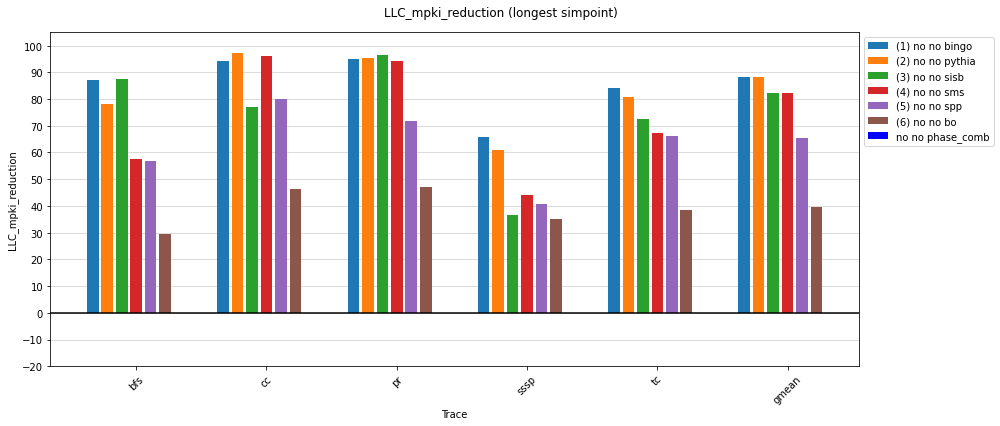

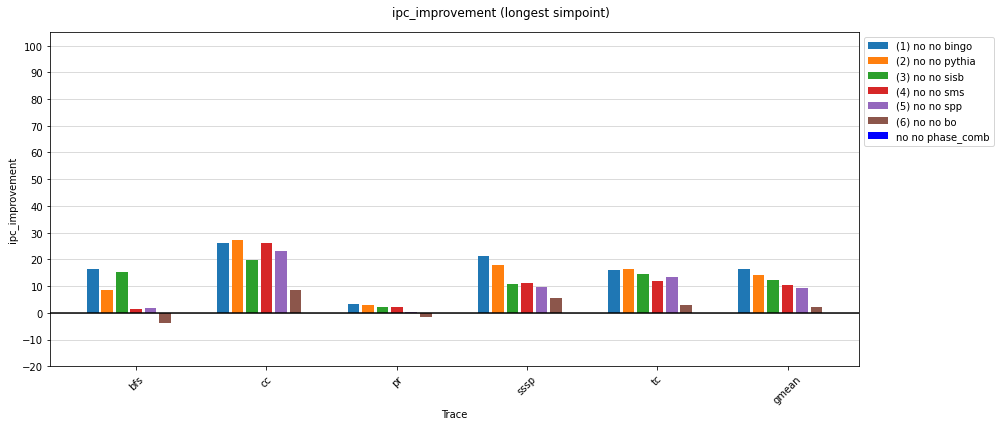

In [24]:
gap_top_single = utils.rank_prefetchers(
    df[df.trace.isin(utils.gap) & df.LLC_pref.isin(['sisb', 'sms', 'bingo', 'bo', 'spp', 'pythia'])], 
    'ipc_improvement', 6
)
opp_pref = [('no', 'no', 'phase_comb')]
dpi = None

# TODO : Fix why phase_combined isn't coming up for this set of prefetchers gap_top_single.

# MPKI reduction
plot_cumulative_statistics(df, weights, metric='LLC_mpki_reduction', method='longest',
                           prefetchers=gap_top_single,
                           opportunity_prefetchers=opp_pref,
                           benchmarks=utils.gap,
                           ymin=-20, ymax=105, dpi=dpi)
plt.savefig('plots/zoo-stats/mpki_reduction_single_gap.pdf')

# DRAM bw reduction
# plot_cumulative_statistics(df, weights, metric='dram_bw_reduction', method='longest',
#                            prefetchers=gap_top_single,
#                            opportunity_prefetchers=opp_pref,
#                            benchmarks=utils.gap,
#                            ymin=-60, ymax=60, dpi=dpi)
# plt.savefig('plots/zoo-stats/dram_bw_reduction_single_gap.pdf')

# IPC improvement
plot_cumulative_statistics(df, weights, metric='ipc_improvement', method='longest',
                           prefetchers=gap_top_single,
                           opportunity_prefetchers=opp_pref,
                           benchmarks=utils.gap,
                           ymin=-20, ymax=105, dpi=dpi)
plt.savefig('plots/zoo-stats/ipc_improvement_single_gap.pdf')

---
## CloudSuite cumulative statistics

### Top 5 by IPC improvement

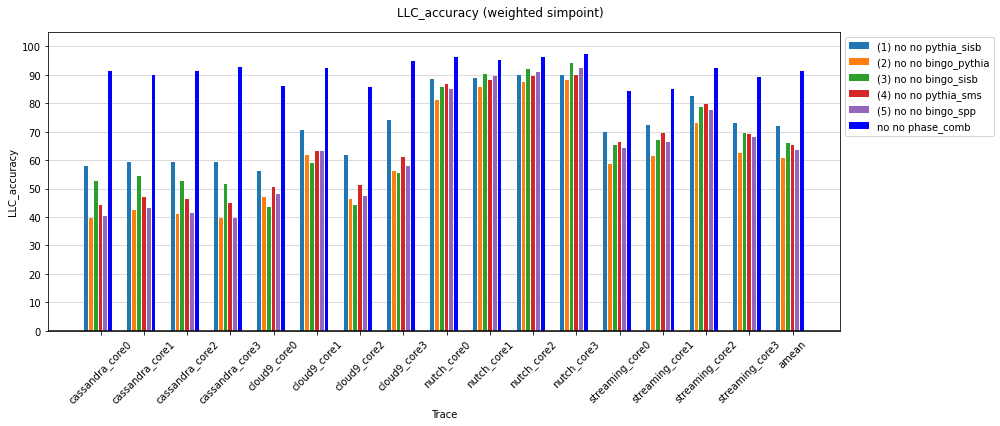

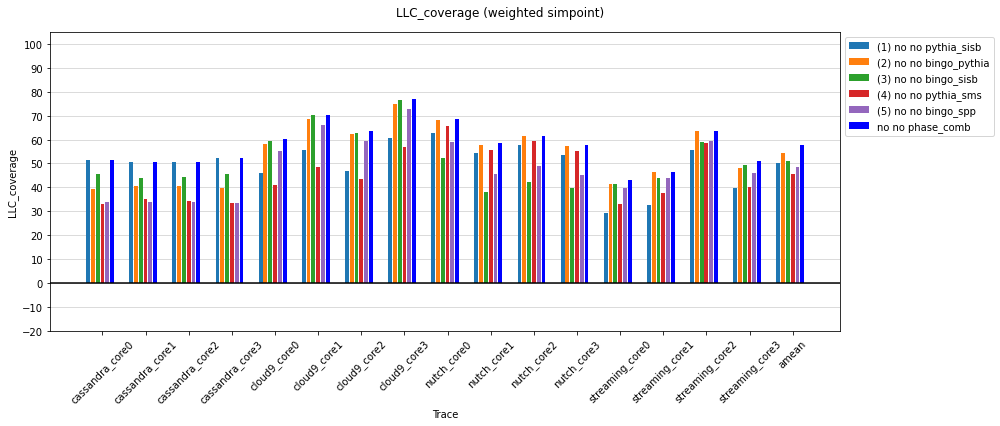

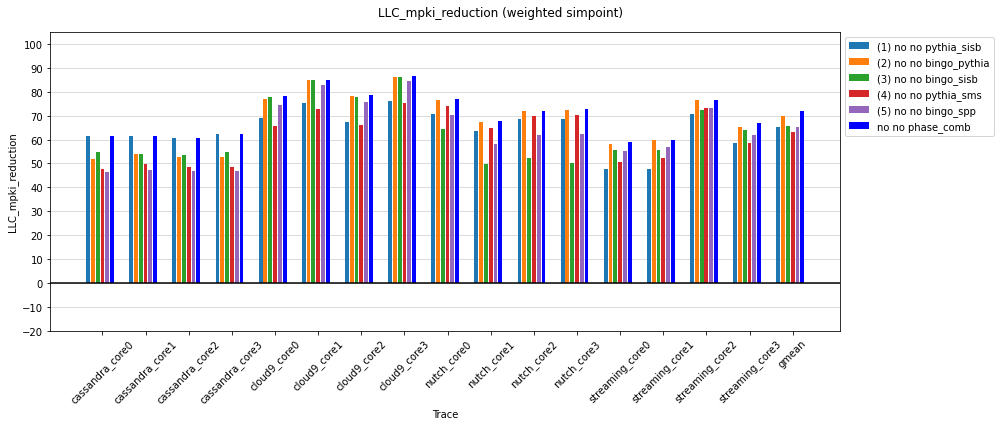

In [ ]:
cs_top_5 = utils.rank_prefetchers(df[df.trace.isin(utils.cloudsuite)], 'ipc_improvement', 5)
opp_pref = [('no', 'no', 'phase_comb')]
dpi = None

# Accuracy
plot_cumulative_statistics(df, weights, metric='LLC_accuracy', method='weighted',
                           prefetchers=cs_top_5,
                           opportunity_prefetchers=opp_pref,
                           benchmarks=utils.cloudsuite,
                           ymin=0, ymax=105, dpi=dpi)

# Coverage
plot_cumulative_statistics(df, weights, metric='LLC_coverage', method='weighted',
                           prefetchers=cs_top_5,
                           opportunity_prefetchers=opp_pref,
                           benchmarks=utils.cloudsuite,
                           ymin=-20, ymax=105, dpi=dpi)

# MPKI reduction
plot_cumulative_statistics(df, weights, metric='LLC_mpki_reduction', method='weighted',
                           prefetchers=cs_top_5,
                           opportunity_prefetchers=opp_pref,
                           benchmarks=utils.cloudsuite,
                           ymin=-20, ymax=105, dpi=dpi)
plt.savefig('plots/zoo-stats/mpki_reduction_5_cloudsuite.pdf')

# DRAM bw reduction
# plot_cumulative_statistics(df, weights, metric='dram_bw_reduction', method='weighted',
#                            prefetchers=cs_top_5,
#                            opportunity_prefetchers=opp_pref,
#                            benchmarks=utils.cloudsuite,
#                            ymin=-60, ymax=60, dpi=dpi)
# plt.savefig('plots/zoo-stats/dram_bw_reduction_5_cloudsuite.pdf')

# IPC improvement
plot_cumulative_statistics(df, weights, metric='ipc_improvement', method='weighted',
                           prefetchers=cs_top_5,
                           opportunity_prefetchers=opp_pref,
                           benchmarks=utils.cloudsuite,
                           ymin=-10, ymax=30, dpi=dpi)
plt.savefig('plots/zoo-stats/ipc_improvement_5_cloudsuite.pdf')